# Synthetic Signal Analysis with EMD and HT (HHT) 

* Run EMD on your signal under different tuning conditions of the algorithm and observe the results: 

    * At least two different splines: Natural and Hermite
    * Set different stopage criteria: sifting number=10, run until the default version of the algorithm stops
    * Run FFT on each IMF
    * Compute the IF with HT on each IMF
* Repeat the above with added noise and offset and observe the results 

Note: run the step by step version of the algorithm where you start with the extrema, envelope, mean envelope and the selection process of each of the IMF.  

In [2]:
%matplotlib notebook

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy

### Plot of the original signal 

<IPython.core.display.Javascript object>


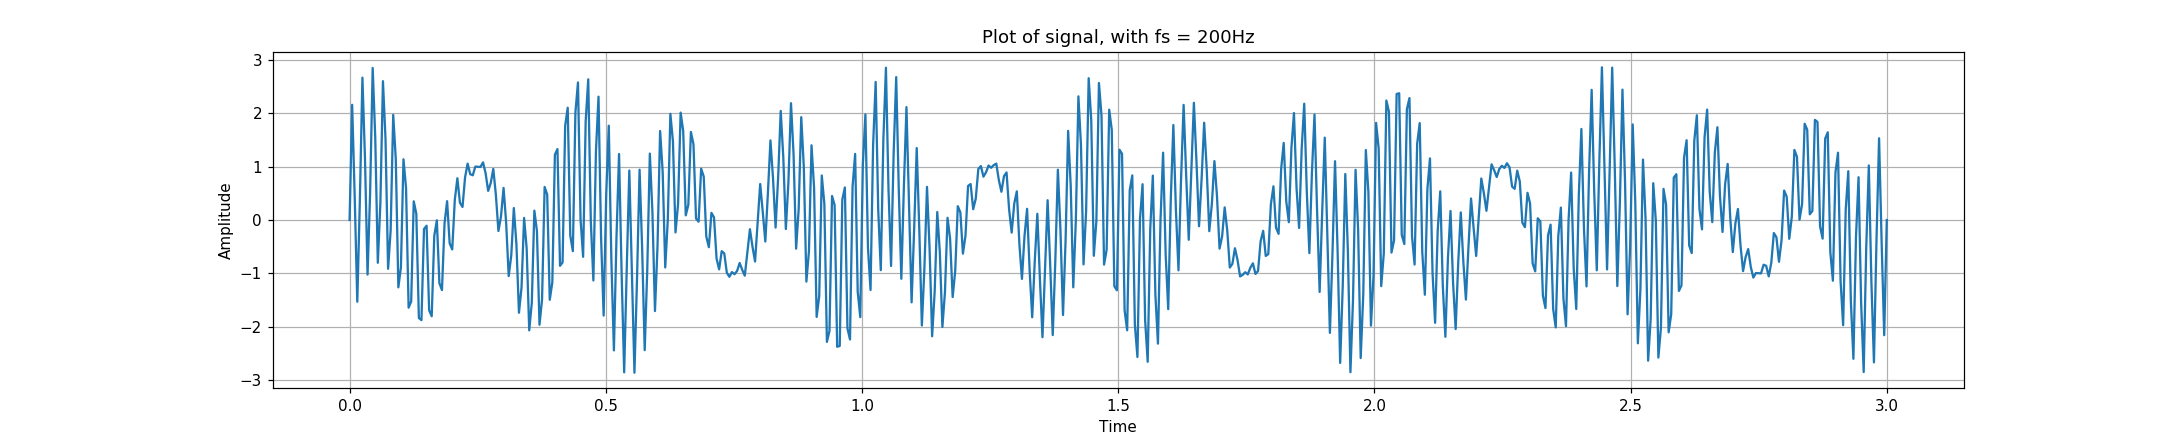

In [4]:
'''
Since the maximum frequency in our signal is 50Hz, then the sampeling 
frequency needs to be bigger than 2*50Hz => over 100Hz
'''
T0 = 3
fs = 200.0
T = 1.0/fs
N = int(T0 / T)



x = np.linspace(0.0, N*T, N)

y = np.sin(5.0 * 2.0*np.pi*x) + np.sin(48.0 * 2.0*np.pi*x)+ np.sin(50.0 * 2.0*np.pi*x)

plt.figure(figsize=(20, 4))
plt.plot(x, y)
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.title('Plot of signal, with fs = 200Hz')
plt.grid()
plt.draw()

### EMD with a cubic spline

<IPython.core.display.Javascript object>


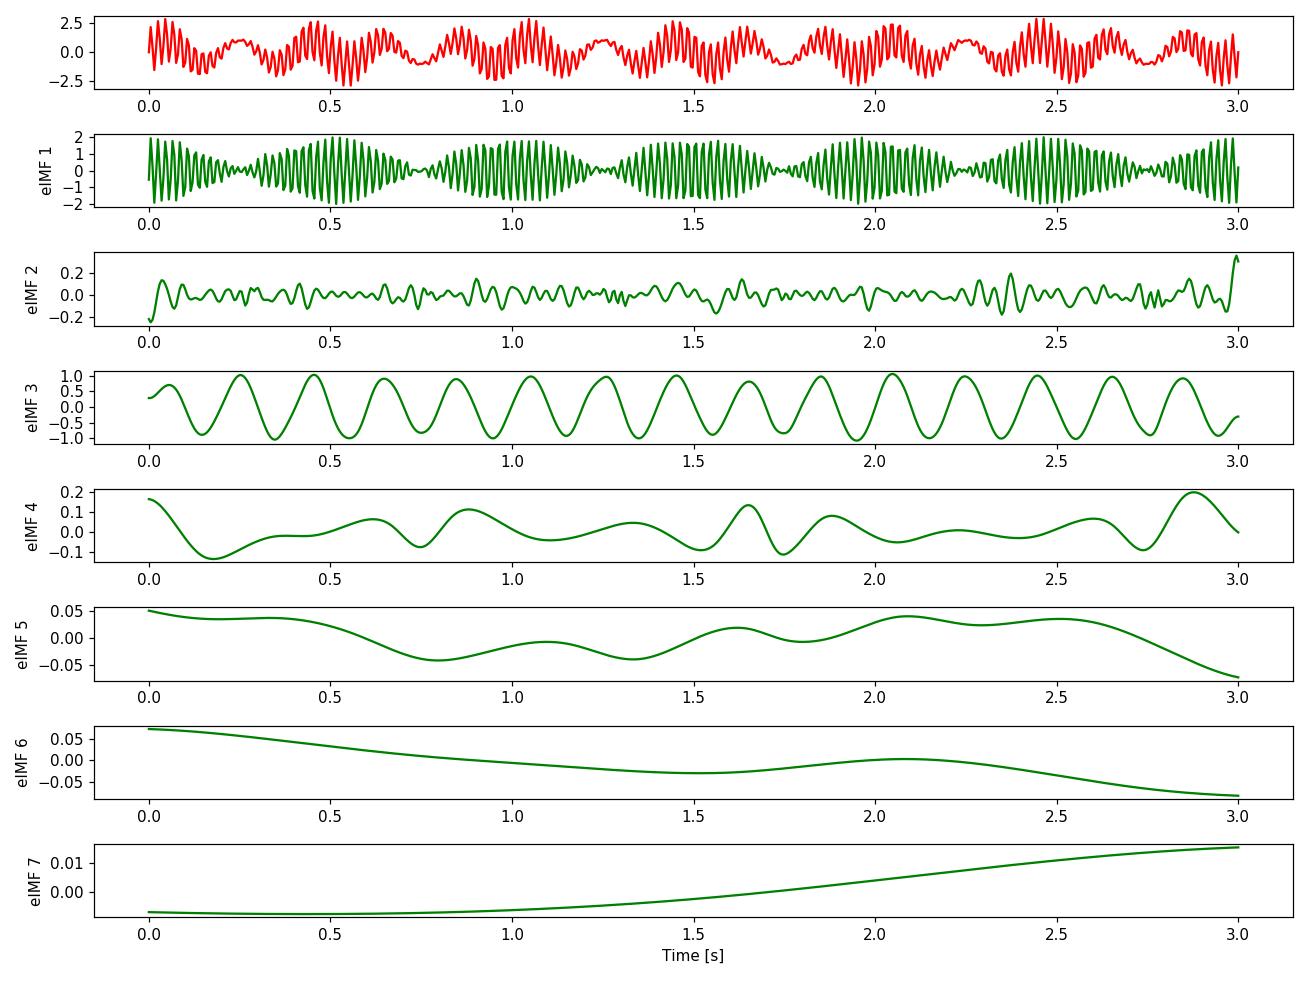

In [8]:
from PyEMD import EEMD
import numpy as np
import pylab as plt

# Assign EEMD to `eemd` variable
eemd = EEMD()

# Say we want detect extrema using parabolic method
emd = eemd.EMD
#emd.extrema_detection="parabol"

# Execute EEMD on S
eIMFs = eemd.eemd(y, x)
nIMFs = eIMFs.shape[0]

# Plot results
plt.figure(figsize=(12,9))
plt.subplot(nIMFs+1, 1, 1)
plt.plot(x, y, 'r')

for n in range(nIMFs):
    plt.subplot(nIMFs+1, 1, n+2)
    plt.plot(x, eIMFs[n], 'g')
    plt.ylabel("eIMF %i" %(n+1))
    plt.locator_params(axis='y', nbins=5)

plt.xlabel("Time [s]")
plt.tight_layout()
plt.savefig('eemd_example', dpi=120)
plt.show()

###

<IPython.core.display.Javascript object>


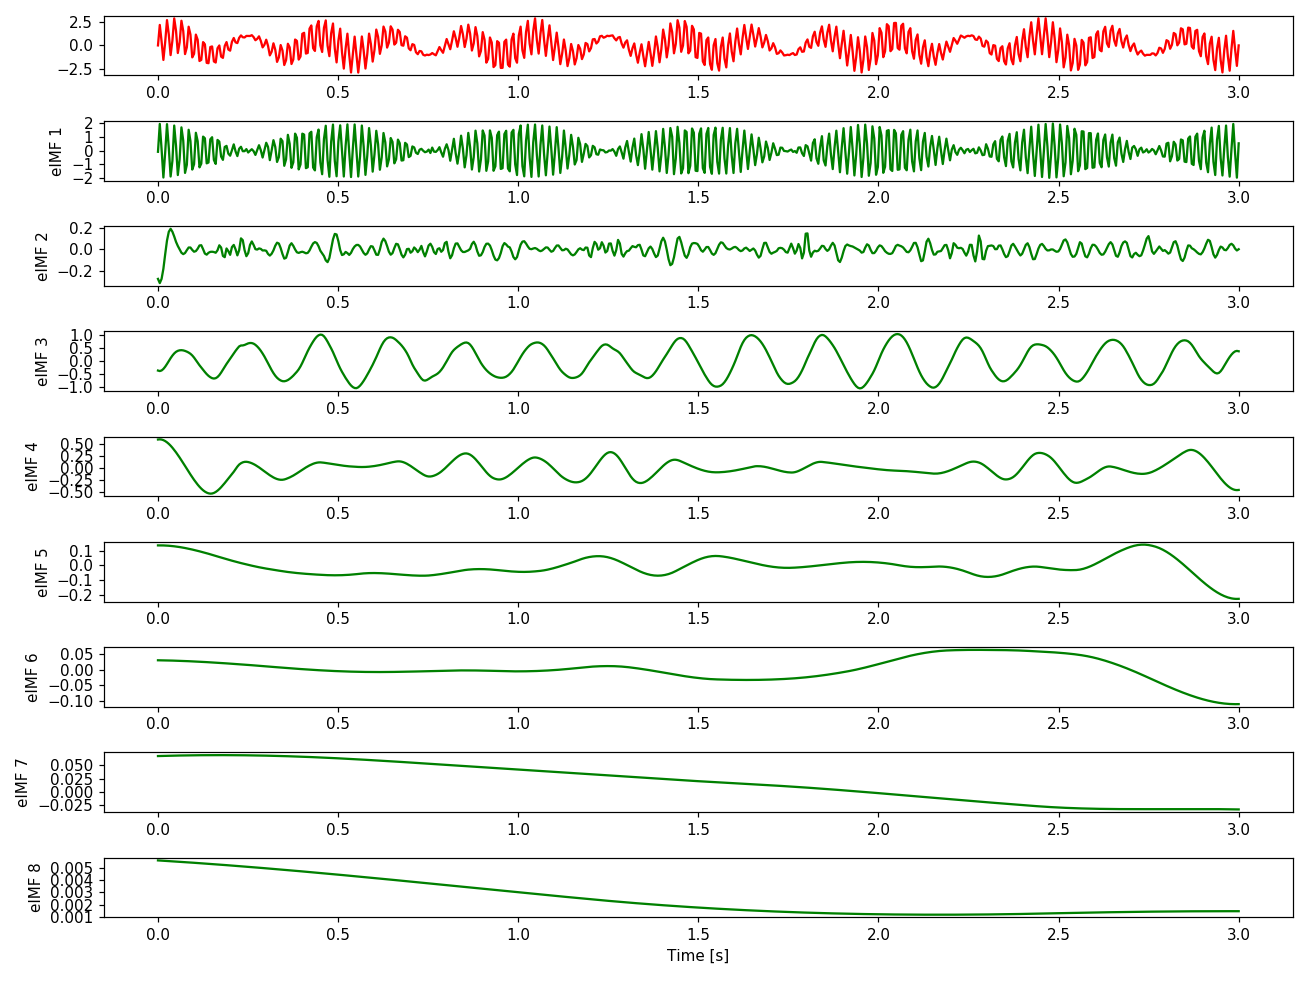

In [17]:
# Assign EEMD to `eemd` variable
eemd = EEMD()

# Say we want detect extrema using parabolic method
emd = eemd.EMD
emd.spline_kind="akima"

# Execute EEMD on S
eIMFs = eemd.eemd(y, x)
nIMFs = eIMFs.shape[0]

# Plot results
plt.figure(figsize=(12,9))
plt.subplot(nIMFs+1, 1, 1)
plt.plot(x, y, 'r')

for n in range(nIMFs):
    plt.subplot(nIMFs+1, 1, n+2)
    plt.plot(x, eIMFs[n], 'g')
    plt.ylabel("eIMF %i" %(n+1))
    plt.locator_params(axis='y', nbins=5)

plt.xlabel("Time [s]")
plt.tight_layout()
plt.savefig('eemd_example', dpi=120)
plt.show()

<IPython.core.display.Javascript object>


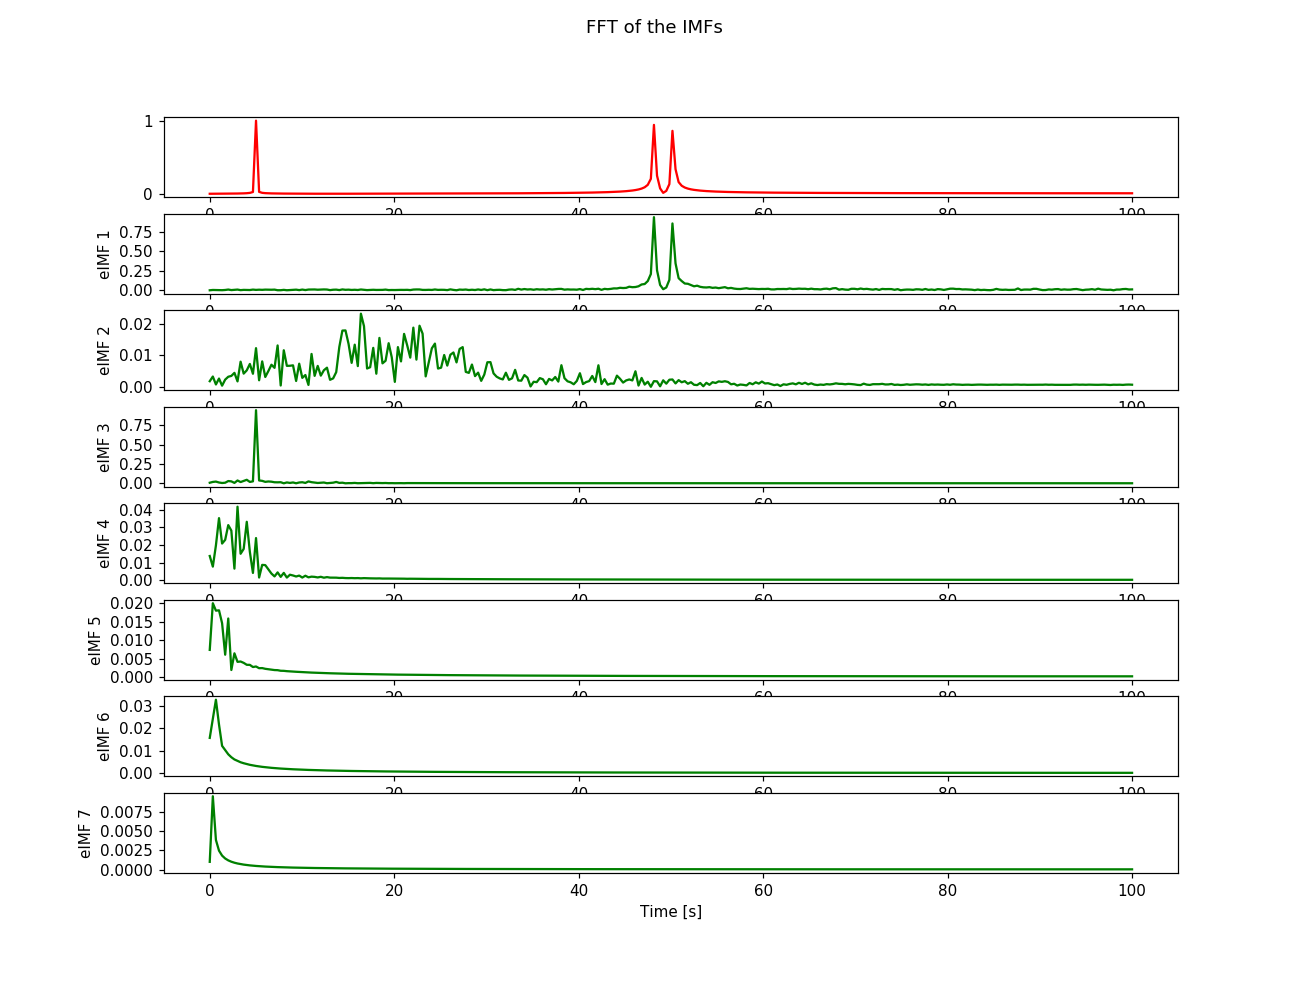

Text(0.5, 0.98, 'FFT of the IMFs')

In [16]:
from scipy.fft import fft
yf = fft(y)

xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
# Plot results
plt.figure(figsize=(12,9))


plt.subplot(nIMFs+1, 1, 1)
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]), 'r')

for n in range(nIMFs):
    yf = fft(eIMFs[n])

    xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
    
    plt.subplot(nIMFs+1, 1, n+2)
    plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]), 'g')
    plt.ylabel("eIMF %i" %(n+1))
    plt.xlabel('Time [s]')
    plt.locator_params(axis='y', nbins=5)
plt.suptitle('FFT of the IMFs')